# Assigment 1
Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution.
Use 2 tests: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this.
Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)
### IDEA:
Does the gaussian model sensibly fit the distribution of age among Citibike riders?
### NULL HYPOTHESIS:
The distribution of CitiBike riders by age is equal to that of a gaussian model, significance level p=0.05.

$H_0$ : Dist_citibike~N($\mu$, $\sigma$)

### ALTERNATIVE HYPOTHESIS:
The distribution of CitiBike riders by age is not equal to that of a gaussian model, significance level p=0.05.

In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import scipy.stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
os.getenv('PUI2016')
os.getenv('PUIDATA')

'/home/cusp/ss9558/PUIdata'

In [4]:
!curl -O 'https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32.9M  100 32.9M    0     0  26.8M      0  0:00:01  0:00:01 --:--:-- 31.5M


In [5]:
!unzip 201507-citibike-tripdata.zip

Archive:  201507-citibike-tripdata.zip
  inflating: 201507-citibike-tripdata.csv  


In [6]:
df = pd.read_csv('201507-citibike-tripdata.csv')

In [7]:
df = df[df.usertype != 'Customer']
#df.drop(['starttime', 'stoptime', 'start station name', 'end station name'], axis=1, inplace=True)
df['age'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber')]
df['age'].dropna(inplace= True)
df_age = df['age']
df_age.describe()

count    905311.000000
mean         39.351615
std          11.440139
min          17.000000
25%          30.000000
50%          37.000000
75%          47.000000
max         131.000000
Name: age, dtype: float64

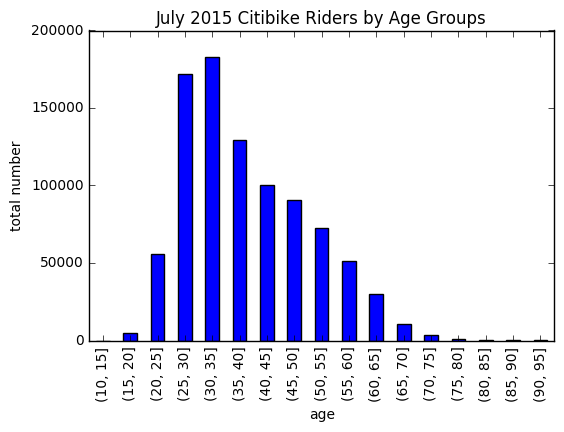

In [9]:
bins = np.arange(10, 99, 5)
ax = df_age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
ax.set_title("July 2015 Citibike Riders by Age Groups")
ax.set_ylabel("total number")

# KS test

In [10]:
scipy.stats.kstest(df_age,'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [20]:
#test on the other distribution,here I choose a lognormal distribution
scipy.stats.kstest(df_age,'lognorm',args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.51892769742448841, pvalue=0.0)

# AD test

In [24]:
scipy.stats.anderson(df_age, dist='norm')

AndersonResult(statistic=13805.856181447394, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [27]:
#test on the other distribution,here I choose an exponential distribution
scipy.stats.anderson(df_age, dist='expon')

AndersonResult(statistic=216340.95160200982, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

# Chisquare test

In [21]:
#from scipy.stats import chisquare

# Results

From the KS test:

Both a normal distribution and a lognormal distribution return a p value at 0.00, thus we reject the null
hypothese.
The distribution of CitiBike riders by age does not fit a gaussian distribution (or a lognormal distribution).

From the AD test: 

AD tests at normal and exponential distributions returned statistic values greater than the critical values, thus we reject the null hypothesis in both cases.
The distribution of CitiBike riders by age does not fit a gaussian distribution (or a exponential distribution.)
